In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('KaggleV2-May-2016.csv', error_bad_lines=False)

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.shape

(110527, 14)

In [ ]:
# Limpando os dados

In [ ]:
for name in df.columns:
  value_count = df[name].value_counts()
  print(value_count)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
                ..
1.222828e+13     1
6.821231e+11     1
7.163981e+14     1
9.798964e+14     1
2.724571e+11     1
Name: PatientId, Length: 62299, dtype: int64
5769215    1
5731652    1
5707080    1
5702986    1
5715276    1
          ..
5586290    1
5584243    1
5598584    1
5602682    1
5771266    1
Name: AppointmentID, Length: 110527, dtype: int64
F    71840
M    38687
Name: Gender, dtype: int64
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-04-29T08:30:04Z     1
2016-05-02T11:24:42Z     1
2016-04-28T07:39:00Z     1
2016-05-10T16:37:55Z     1
2016-05-31T17:10:28Z     1
Name: ScheduledDay, Length: 103549, dtype: int64
2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00

In [ ]:
# Verificando se existem valores de idade negativos ou iguais a zero

df['Age'][df['Age'] <= 0].count()

3540

In [ ]:
# Substituindo esses valores pela média das idades

df['Age'][df['Age'] <= 0] = df['Age'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Deletando colunas de id, que não possuem informações importantes para o estudo

df.drop(columns=['AppointmentID', 'PatientId'], axis=1, inplace=True)

In [ ]:
# Colocando em formato datetime as colunas de datas

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%dT')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT')

In [ ]:
# Criando uma nova coluna de dias até a consulta, que é a subtração entre o dia da consulta e o dia que ela foi marcada

df['DaysUntilAppointment'] = df['AppointmentDay'].sub(df['ScheduledDay'], axis=0)

In [ ]:
# Transformando o resultado em dias

df['DaysUntilAppointment'] = df['DaysUntilAppointment'].dt.days

In [ ]:
# Tratando resultados iguais ou menores que 0

df['DaysUntilAppointment'][df['DaysUntilAppointment'] <= 0] = df['DaysUntilAppointment'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# M = 0, F = 1
df['Gender'][df['Gender'] == 'M'] = 0
df['Gender'][df['Gender'] == 'F'] = 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.isna().sum()

Gender                  0
ScheduledDay            0
AppointmentDay          0
Age                     0
Neighbourhood           0
Scholarship             0
Hipertension            0
Diabetes                0
Alcoholism              0
Handcap                 0
SMS_received            0
No-show                 0
DaysUntilAppointment    0
dtype: int64

In [ ]:
df.duplicated().sum()

635

In [ ]:
df.drop_duplicates()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysUntilAppointment
0,1,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,9.183702
1,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,9.183702
2,1,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,9.183702
3,1,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,9.183702
4,1,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,9.183702
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,1,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56.0,MARIA ORTIZ,0,0,0,0,0,1,No,34.000000
110523,1,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51.0,MARIA ORTIZ,0,0,0,0,0,1,No,34.000000
110524,1,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21.0,MARIA ORTIZ,0,0,0,0,0,1,No,40.000000
110525,1,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38.0,MARIA ORTIZ,0,0,0,0,0,1,No,40.000000


In [ ]:
# Tratando a coluna Neighbourhood

dummies = pd.get_dummies(df.Neighbourhood)

In [ ]:
dummies

,AEROPORTO,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,CENTRO,COMDUSA,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DE LOURDES,DO CABRAL,DO MOSCOSO,DO QUADRO,ENSEADA DO SUÁ,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,FRADINHOS,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,HORTO,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO BOI,ILHA DO FRADE,ILHA DO PRÍNCIPE,ILHAS OCEÂNICAS DE TRINDADE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,...,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,MORADA DE CAMBURI,MÁRIO CYPRESTE,NAZARETH,NOVA PALESTINA,PARQUE INDUSTRIAL,PARQUE MOSCOSO,PIEDADE,PONTAL DE CAMBURI,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CECÍLIA,SANTA CLARA,SANTA HELENA,SANTA LUÍZA,SANTA LÚCIA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110523,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Coluna 'No-Show': No = 0, Yes = 1

df['No-show'][df['No-show'] == 'No'] = 0
df['No-show'][df['No-show'] == 'Yes'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Análise exploratória

In [ ]:
showed = df['No-show'] == 0
not_showed = df['No-show'] == 1

In [ ]:
df['showed'] = showed
df['not_showed'] = not_showed

In [ ]:
idade_showed = df.filter(items=['showed', 'Age'])

In [ ]:
idade_showed.groupby('Age').count()

,showed
Age,
1.0,2273
2.0,1618
3.0,1513
4.0,1299
5.0,1489
...,...
98.0,6
99.0,1
100.0,4


In [ ]:
idade_showed.head()

,showed,Age
0,True,62.0
1,True,56.0
2,True,62.0
3,True,8.0
4,True,56.0


No handles with labels found to put in legend.


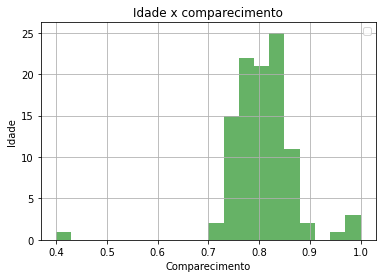

In [ ]:
import matplotlib.pyplot as plt

df.groupby('Age')['showed'].mean().hist(alpha=0.6,bins=20, color='green');
plt.xlabel("Comparecimento")
plt.ylabel("Idade")
plt.title("Idade x comparecimento")
plt.legend()

In [ ]:
show_scholarship = df.filter(items=['showed', 'Scholarship'])

In [ ]:
show_scholarship.groupby('Scholarship').count()

,showed
Scholarship,
0,99666
1,10861


No handles with labels found to put in legend.


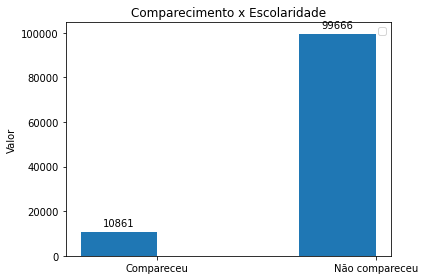

In [ ]:
labels = ['Compareceu', 'Não compareceu']
data = [10861, 99666]

loc = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loc1 = [x - width/2 for x in loc]
loc2 = [x + width/2 for x in loc]

fig, ax = plt.subplots()
rects1 = ax.bar(loc1, data, width,)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Valor')
ax.set_title('Comparecimento x Escolaridade')
ax.set_xticks(loc)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysUntilAppointment,showed,not_showed
0,1,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0,9.183702,True,False
1,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0,9.183702,True,False
2,1,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,0,9.183702,True,False
3,1,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,9.183702,True,False
4,1,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0,9.183702,True,False


In [ ]:
# Usando os classificadores

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
clf_knn = KNeighborsClassifier()
clf_rand = RandomForestClassifier()
clf_svm = SVC()

In [ ]:
new_data = pd.concat([df, dummies], axis=1)

In [ ]:
new_data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysUntilAppointment,showed,not_showed,AEROPORTO,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,CENTRO,COMDUSA,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DE LOURDES,DO CABRAL,DO MOSCOSO,DO QUADRO,ENSEADA DO SUÁ,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,FRADINHOS,...,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,MORADA DE CAMBURI,MÁRIO CYPRESTE,NAZARETH,NOVA PALESTINA,PARQUE INDUSTRIAL,PARQUE MOSCOSO,PIEDADE,PONTAL DE CAMBURI,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CECÍLIA,SANTA CLARA,SANTA HELENA,SANTA LUÍZA,SANTA LÚCIA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,1,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0,9.183702,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0,9.183702,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,0,9.183702,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,9.183702,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0,9.183702,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# OBS: O modelo foi colocado pra rodar considerando os dados tratados de Neighbourhood, entretanto na
# etapa de feature selection, ele não tido como relevante. Portanto, optou-se por desconsiderar essas 
# colunas, de forma que o modelo se torne menos pesado, já que, ao acrescentá-las, não houve mudança
# significativa nas métricas

In [ ]:
X = df.drop(columns=['No-show', 'showed', 'not_showed', 'Neighbourhood', 'ScheduledDay', 'AppointmentDay'], axis=1)
y = np.ravel(pd.DataFrame(columns=['No-show'], data=df))
y=y.astype('int')

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, f1_score
scoring = {'accuracy': make_scorer(accuracy_score), 
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1_macro': make_scorer(f1_score, average='weighted')}

def getMetrics(model, X, y):
  score = cross_validate(model, X, y, scoring=scoring, cv=3)
  accuracy = round(score['test_accuracy'].mean(),3)
  precision = round(score['test_precision'].mean(),3)
  recall = round(score['test_recall'].mean(),3)
  f1 = round(score['test_f1_macro'].mean(),3)

  return accuracy, precision, recall, f1

In [ ]:
metrics_knn = getMetrics(clf_knn, X, y)
metrics_rand = getMetrics(clf_rand, X, y)
metrics_svm = getMetrics(clf_svm, X, y)

print('Accuracy, precision, recall e f1 p/ KNN: ', metrics_knn)
print('Accuracy, precision, recall e f1 p/ Random Forests: ', metrics_rand)
print('Accuracy, precision, recall e f1 p/ SVM: ', metrics_svm)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy, precision, recall e f1 p/ KNN:  (0.766, 0.715, 0.766, 0.732)
Accuracy, precision, recall e f1 p/ Random Forests:  (0.761, 0.719, 0.761, 0.734)
Accuracy, precision, recall e f1 p/ SVM:  (0.798, 0.637, 0.798, 0.708)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Escolhendo as características mais importantes 

forest_fit = clf_rand.fit(X, y)
importance = forest_fit.feature_importances_
importance

array([0.0178888 , 0.41581569, 0.00872913, 0.00995587, 0.00869017,
       0.00758227, 0.00963356, 0.02528496, 0.49641954])

In [ ]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'DaysUntilAppointment', 'showed',
       'not_showed'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(forest_fit, prefit=True)
X_novo = model.transform(X)

n_attrs = X_novo.shape[1]

idx_most_important = importance.argsort()[-n_attrs:]
print(idx_most_important)

name_important_attrs = np.array(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'DaysUntilAppointment'])[idx_most_important]
print(name_important_attrs)

[1 8]
['Age' 'DaysUntilAppointment']


In [ ]:
X_novo

array([[62.0, 9.183701719941734],
       [56.0, 9.183701719941734],
       [62.0, 9.183701719941734],
       ...,
       [21.0, 40.0],
       [38.0, 40.0],
       [54.0, 40.0]], dtype=object)

In [ ]:
# Agora, recalculando as métricas: 

metrics_knn_imp = getMetrics(clf_knn, X_novo, y)
metrics_rand_imp = getMetrics(clf_rand, X_novo, y)
metrics_svm_imp = getMetrics(clf_svm, X_novo, y)

print('Accuracy, precision, recall e f1 p/ KNN (características mais relevantes): ', metrics_knn_imp)
print('Accuracy, precision, recall e f1 p/ Random Forests (características mais relevantes): ', metrics_rand_imp)
print('Accuracy, precision, recall e f1 p/ SVM (características mais relevantes): ', metrics_svm_imp)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy, precision, recall e f1 p/ KNN (características mais relevantes):  (0.757, 0.711, 0.757, 0.728)
Accuracy, precision, recall e f1 p/ Random Forests (características mais relevantes):  (0.778, 0.715, 0.778, 0.73)
Accuracy, precision, recall e f1 p/ SVM (características mais relevantes):  (0.798, 0.653, 0.798, 0.708)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


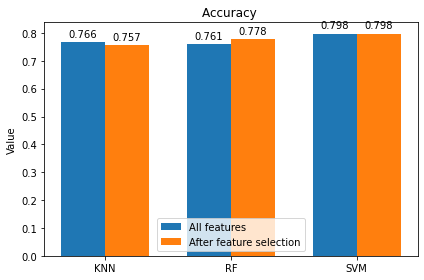

In [ ]:
# Accuracy

import matplotlib
import matplotlib.pyplot as plt

labels = ['KNN', 'RF', 'SVM']
metrics = [metrics_knn[0], metrics_rand[0], metrics_svm[0]]
metrics_importance = [metrics_knn_imp[0], metrics_rand_imp[0], metrics_svm_imp[0]]

loc = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loc1 = [x - width/2 for x in loc]
loc2 = [x + width/2 for x in loc]

fig, ax = plt.subplots()
rects1 = ax.bar(loc1, metrics, width, label='All features')
rects2 = ax.bar(loc2, metrics_importance, width, label='After feature selection')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Accuracy ')
ax.set_xticks(loc)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

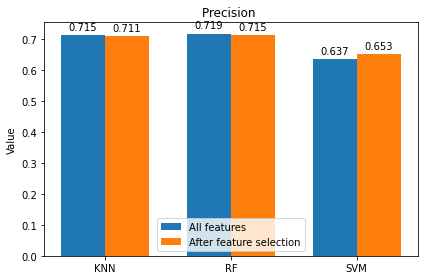

In [ ]:
# Precision

import matplotlib
import matplotlib.pyplot as plt

labels = ['KNN', 'RF', 'SVM']
metrics = [metrics_knn[1], metrics_rand[1], metrics_svm[1]]
metrics_importance = [metrics_knn_imp[1], metrics_rand_imp[1], metrics_svm_imp[1]]

loc = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loc1 = [x - width/2 for x in loc]
loc2 = [x + width/2 for x in loc]

fig, ax = plt.subplots()
rects1 = ax.bar(loc1, metrics, width, label='All features')
rects2 = ax.bar(loc2, metrics_importance, width, label='After feature selection')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Precision ')
ax.set_xticks(loc)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

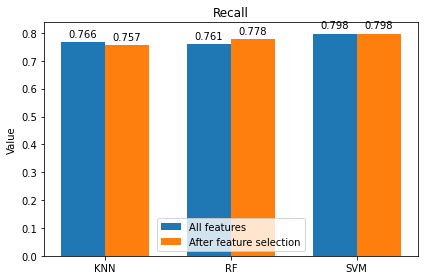

In [ ]:
# Recall

import matplotlib
import matplotlib.pyplot as plt

labels = ['KNN', 'RF', 'SVM']
metrics = [metrics_knn[2], metrics_rand[2], metrics_svm[2]]
metrics_importance = [metrics_knn_imp[2], metrics_rand_imp[2], metrics_svm_imp[2]]

loc = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loc1 = [x - width/2 for x in loc]
loc2 = [x + width/2 for x in loc]

fig, ax = plt.subplots()
rects1 = ax.bar(loc1, metrics, width, label='All features')
rects2 = ax.bar(loc2, metrics_importance, width, label='After feature selection')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Recall')
ax.set_xticks(loc)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

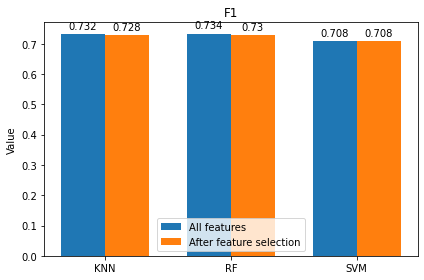

In [ ]:
# F1

import matplotlib
import matplotlib.pyplot as plt

labels = ['KNN', 'RF', 'SVM']
metrics = [metrics_knn[3], metrics_rand[3], metrics_svm[3]]
metrics_importance = [metrics_knn_imp[3], metrics_rand_imp[3], metrics_svm_imp[3]]

loc = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loc1 = [x - width/2 for x in loc]
loc2 = [x + width/2 for x in loc]

fig, ax = plt.subplots()
rects1 = ax.bar(loc1, metrics, width, label='All features')
rects2 = ax.bar(loc2, metrics_importance, width, label='After feature selection')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('F1')
ax.set_xticks(loc)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()